[[  31456  318241 2924001   62094  621231 5872190   94086  937850 8825401]
 [  31456  318241 2924001   62094  621231 5872190   94086  937850 8825401]
 [  31456  318241 2924001   62094  621231 5872190   94086  937850 8825401]
 [  31456  318241 2924001   62094  621231 5872190   94086  937850 8825401]
 [  31456  318241 2924001   62094  621231 5872190   94086  937850 8825401]
 [  31456  318241 2924001   62094  621231 5872190   94086  937850 8825401]
 [  31456  318241 2924001   62094  621231 5872190   94083  937850 8825401]
 [  31456  318241 2924001   62094  621231 5872190   94086  937850 8825401]]


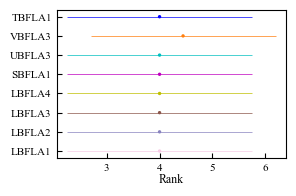

[[   37036.    367109.   3488884.4    73791.    731978.   7076972.7
    110799.   1104868.  10549792.9]
 [   37036.    367109.   3488884.7    73791.    731978.   7076973.
    110799.   1104868.  10549793. ]
 [   37036.    367109.   3488884.6    73791.    731978.   7076972.7
    110799.   1104868.  10549793. ]
 [   37036.    367109.   3488884.6    73791.    731978.   7076973.
    110799.   1104868.  10549793. ]
 [   37036.    367109.   3488884.8    73791.    731978.   7076972.9
    110799.   1104868.  10549793. ]
 [   37036.    367109.   3488884.5    73791.    731978.   7076973.
    110799.   1104868.  10549793. ]
 [   37036.    367109.   3488883.1    73791.    731978.   7076971.9
    110799.   1104868.  10549792.6]
 [   37036.    367108.8  3488884.7    73791.    731978.   7076973.
    110799.   1104868.  10549793. ]]


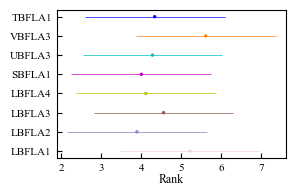

[[   43912.6    427820.2   4107505.2     88264.9    871332.3   8355946.
    129798.    1297251.1  12490524.8 ]
 [   43912.8    427818.9   4107503.6     88264.8    871331.6   8355947.6
    129798.    1297251.8  12490524.8 ]
 [   43913.     427820.    4107505.6     88264.8    871331.3   8355946.
    129798.    1297253.   12490520.8 ]
 [   43913.     427820.    4107504.      88265.     871331.3   8355946.
    129798.    1297249.4  12490520.7 ]
 [   43912.75   427820.4   4107505.2     88264.9    871331.4   8355947.6
    129798.    1297251.8  12490521.9 ]
 [   43912.8    427820.    4107510.      88265.     871331.3   8355947.6
    129798.    1297247.   12490521.4 ]
 [   43912.1    427817.3   4107500.4     88264.8    871331.3   8355946.
    129798.    1297252.2  12490519.1 ]
 [   43912.1    427808.7   4107510.      88265.     871331.3   8355946.
    129798.    1297241.4  12490518.1 ]]


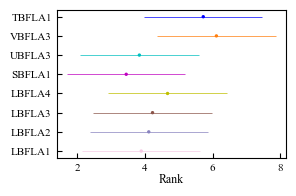

[[  31900.   315523.  2983455.8   65009.   623905.7 5983425.3   96786.
   950502.9 8797970.1]
 [  31900.   315523.  2983458.5   65009.   623905.7 5983425.2   96786.
   950502.7 8797970.2]
 [  31900.   315523.  2983463.2   65009.   623905.6 5983426.4   96786.
   950503.3 8797971.3]
 [  31900.   315523.  2983462.6   65009.   623905.7 5983426.6   96786.
   950503.  8797971. ]
 [  31900.   315523.  2983458.4   65009.   623905.5 5983424.8   96786.
   950502.9 8797969.4]
 [  31900.   315523.  2983457.6   65009.   623905.3 5983425.3   96786.
   950503.1 8797967.6]
 [  31899.6  315520.5 2983444.    65009.   623905.8 5983422.8   96786.
   950502.5 8797966.8]
 [  31900.   315523.  2983442.4   65009.   623905.2 5983421.8   96786.
   950502.9 8797967. ]]


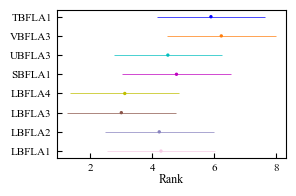

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

"""
    构造降序排序矩阵
"""


def rank_matrix(matrix,allnum):

    cnum = matrix.shape[1]
    rnum = matrix.shape[0]
    ## 升序排序索引
    sorts = np.argsort(-matrix)
    for i in range(rnum):
        k = 1
        n = 0
        flag = False
        nsum = 0
        for j in range(cnum):
            n = n + 1
            ## 相同排名评分序值
            if j < allnum and matrix[i, sorts[i, j]] == matrix[i, sorts[i, j + 1]]:
                flag = True;
                k = k + 1;
                nsum += j + 1;
            elif (j == allnum or (j < allnum and matrix[i, sorts[i, j]] != matrix[i, sorts[i, j + 1]])) and flag:
                nsum += j + 1
                flag = False;
                for q in range(k):
                    matrix[i, sorts[i, j - k + q + 1]] = nsum / k
                k = 1
                flag = False
                nsum = 0
            else:
                matrix[i, sorts[i, j]] = j + 1
                continue
    return matrix


"""
    Friedman检验
    参数：数据集个数n, 算法种数k, 排序矩阵rank_matrix(k x n)
    函数返回检验结果（对应于排序矩阵列顺序的一维数组）
"""


def friedman(n, k, rank_matrix):
    # 计算每一列的排序和
    sumr = sum(list(map(lambda x: np.mean(x) ** 2, rank_matrix.T)))
    result = 12 * n / (k * (k + 1)) * (sumr - k * (k + 1) ** 2 / 4)
    result = (n - 1) * result / (n * (k - 1) - result)
    return result


"""
    Nemenyi检验
    参数：数据集个数n, 算法种数k, 排序矩阵rank_matrix(k x n)
    函数返回CD值
"""


def nemenyi(n, k, q):
    return q * (np.sqrt(k * (k + 1) / (6 * n)))


def getFriedman1(matrix,ty,allnum,alfa): #allnum 算法个数-1
    cfont = FontProperties(fname=r'C:\Windows\Fonts\SimSun.ttc', size=8.5)
    matrix_r = rank_matrix(matrix.T,allnum)
    Friedman = friedman(9, allnum+1, matrix_r)  # 实例个数，算法个数
   
    CD = nemenyi(9, allnum+1, alfa)  # 实例个数，算法个数
    ##画CD图
    rank_x = list(map(lambda x: np.mean(x), matrix))


#     name_y = ["TMHSCA","GVNS-ILP","NDDE","DHMVO","HTLOB2","RTEA","GPSO","HBDE","bEGTOA-DMO"]
#     name_y = ["EGTOA-2","GTOA-2","EGTOA","GTOA"]
#     name_y = ["PF1", "PF2", "PF3", "PF4", "S1", "S2", "S3", "S4", "U1", "U2", "U3", "U4", "V1", "V2", "V3", "V4", "T1", "T2", "T3", "T4"]
    name_y = ["LBFLA1", "LBFLA2", "LBFLA3", "LBFLA4", "SBFLA1", "UBFLA3", "VBFLA3", "TBFLA1"]

    min_ = [x for x in rank_x - CD / 2]
    max_ = [x for x in rank_x + CD / 2]
    
        # 创建颜色列表，使其长度与数据点数量匹配
    colors = ['#F6CAE5', '#8983BF', 'tab:brown', 'y', "m", "c", 'tab:orange', 'b', 'r']
    colors = colors * (len(rank_x) // len(colors)) + colors[:len(rank_x) % len(colors)]
    
    plt.figure(figsize=(3, 2))  # 图片的大小
    plt.rcParams["font.size"] = 8  # 字体大小
    plt.rcParams["font.family"] = 'Times New Roman'  # 字体样式采用新罗马字体
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['xtick.direction'] = 'in'  # 刻度线向内
    plt.rcParams['ytick.direction'] = 'in'  # 将y轴的刻度方向设置向内
#     plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.9)
    plt.xlabel("Rank",fontsize=8.5,labelpad=1)

    plt.scatter(rank_x, name_y, color=colors, s=2)
    plt.hlines(name_y, min_, max_, color=colors, linewidth=0.5)
    plt.tick_params(labelsize=8)

    plt.tight_layout()
    plt.savefig(r'D:\jupyterProject\BFLA\对数传递函数与其他传递函数对比\Friedman'+ty+'.png', format="PNG",dpi=300, bbox_inches='tight',pad_inches=0.02)
    plt.show()
    


if __name__ =="__main__":
    allnum=7
    alfa=3.031


    file_path = r'D:\BaiduSyncdisk\BFLA数据\BFLA_01KP_SUVT_PF\PLF有效性确定之36个实例\ikp1.csv'.strip('\u202a')  # 请将此路径替换为你的实际文件路径
    df = pd.read_csv(file_path, header=None, encoding='utf-8')
    # 转换为NumPy数组
    matrix = df.to_numpy()
    print(matrix)
    getFriedman1(matrix,'ikp',allnum,alfa)
    
    file_path = r'D:\BaiduSyncdisk\BFLA数据\BFLA_01KP_SUVT_PF\PLF有效性确定之36个实例\skp1.csv'.strip('\u202a')  # 请将此路径替换为你的实际文件路
    df = pd.read_csv(file_path, header=None, encoding='utf-8')
    # 转换为NumPy数组
    matrix = df.to_numpy()
    print(matrix)
    getFriedman1(matrix,'skp',allnum,alfa)
    
    file_path = r'D:\BaiduSyncdisk\BFLA数据\BFLA_01KP_SUVT_PF\PLF有效性确定之36个实例\ukp1.csv'.strip('\u202a')  # 请将此路径替换为你的实际文件路
    df = pd.read_csv(file_path, header=None, encoding='utf-8')
    # 转换为NumPy数组
    matrix = df.to_numpy()
    print(matrix)
    getFriedman1(matrix,'ukp',allnum,alfa)
    
    file_path = r'D:\BaiduSyncdisk\BFLA数据\BFLA_01KP_SUVT_PF\PLF有效性确定之36个实例\wkp1.csv'.strip('\u202a')  # 请将此路径替换为你的实际文件路
    df = pd.read_csv(file_path, header=None, encoding='utf-8')
    # 转换为NumPy数组
    matrix = df.to_numpy()
    print(matrix)
    getFriedman1(matrix,'wkp',allnum,alfa)
    
    
    




